In [36]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
telecom_df = pd.read_csv('filtered.csv')

In [38]:
telecom_df.drop(['Unnamed: 0','mobile_number'],axis=1,inplace=True)
#temporary removal of null rows
telecom_df = telecom_df[~(telecom_df['dataHeavy_goodphase'].isnull() | telecom_df['dataHeavy_8'].isnull())]

In [39]:
telecom_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_67,churn,recency_goodphase,recency_data_goodphase,data_volm_used_per_rupee_8,dataHeavy_8,loc_og_t2t_mou_goodphase,loc_ic_t2m_mou_goodphase,loc_ic_mou_goodphase,total_rech_num_goodphase,onnet_mou_goodphase,count_rech_3g_goodphase,vol_3g_mb_goodphase,roam_ic_mou_goodphase,loc_og_t2m_mou_goodphase,total_rech_amt_goodphase,loc_og_t2f_mou_goodphase,std_og_t2m_mou_goodphase,loc_og_t2c_mou_goodphase,std_ic_t2f_mou_goodphase,loc_ic_t2t_mou_goodphase,total_rech_data_goodphase,arpu_2g_goodphase,count_rech_2g_goodphase,roam_og_mou_goodphase,og_others_goodphase,loc_og_mou_goodphase,std_og_mou_goodphase,ic_others_goodphase,total_og_mou_goodphase,std_og_t2t_mou_goodphase,arpu_3g_goodphase,isd_og_mou_goodphase,vol_2g_mb_goodphase,isd_ic_mou_goodphase,std_ic_mou_goodphase,std_ic_t2m_mou_goodphase,total_ic_mou_goodphase,spl_ic_mou_goodphase,spl_og_mou_goodphase,std_ic_t2t_mou_goodphase,loc_ic_t2f_mou_goodphase,offnet_mou_goodphase,std_og_t2f_mou_goodphase,arpu_goodphase,av_rech_amt_data_goodphase,data_volm_used_per_rupee_goodphase,fb_user_goodphase,night_pck_user_goodphase,sachet_2g_goodphase,sachet_3g_goodphase,monthly_2g_goodphase,monthly_3g_goodphase,dataHeavy_goodphase,last_day_rch_amt_goodphase,max_rech_data_goodphase,max_rech_amt_goodphase
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,8.0,252,8.0,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0.0,0,0,1,0,1.0,968,30.40,0.00,101.20,3.58,87.714286,1.0,15.0,15.0,0.457778,1.0,0.000,0.000,0.000,3.3,0.000,1.0,130.603,0.000,0.000,285.0,0.000,0.000,0.0,0.000,0.000,1.0,212.17,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,212.17,0.000,9.963,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,209.5867,252.0,0.557802,1.0,0.0,0,0,0,1,1.0,252,252.0,252
1,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,26.0,779,-1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,802,57.74,19.38,18.74,0.00,237.000000,1.0,6.0,61.0,0.000000,0.0,37.383,220.311,377.025,5.0,55.628,0.0,0.000,28.312,405.755,1027.0,57.237,37.199,0.0,39.625,40.024,0.0,0.00,0.0,15.935,0.0,500.385,70.856,15.355,572.727,17.593,0.00,0.126,0.000,10.789,175.318,116.325,578.566,0.063,1.350,19.348,116.670,533.041,16.054,1265.6490,0.0,0.000000,0.0,0.0,0,0,0,0,0.0,0,0.0,1580
2,170.231,22.43,78.34,0.00,0.00,22.43,34.93,0.00,0.00,57.36,0.00,43.41,0.00,43.41,0.00,0.00,0.0,100.78,49.93,122.58,0.00,172.51,0.00,1.74,0.00,1.74,219.86,0.0,45.59,0.00,5,210,50,29.0,30,-1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,902,0.00,0.00,0.00,0.00,69.166667,0.0,8.0,8.0,0.000000,0.0,31.244,107.250,233.220,2.6,31.244,0.0,0.000,0.000,39.451,202.5,0.000,17.498,0.0,0.000,125.840,0.7,0.00,0.7,0.000,0.0,70.705,17.498,0.000,88.408,0.000,0.00,0.000,5.159,22.376,64.695,64.605,320.311,0.000,0.198,0.090,0.120,56.956,0.000,209.0599,107.8,0.033500,1.0,0.0,0,0,1,0,0.0,154,154.0,154
3,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.5

In [43]:
type(telecom_df['arpu_8'][0])

numpy.float64

In [48]:
#Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(telecom_df)
telecom_df = pd.DataFrame(scaled_df, columns=telecom_df.columns)

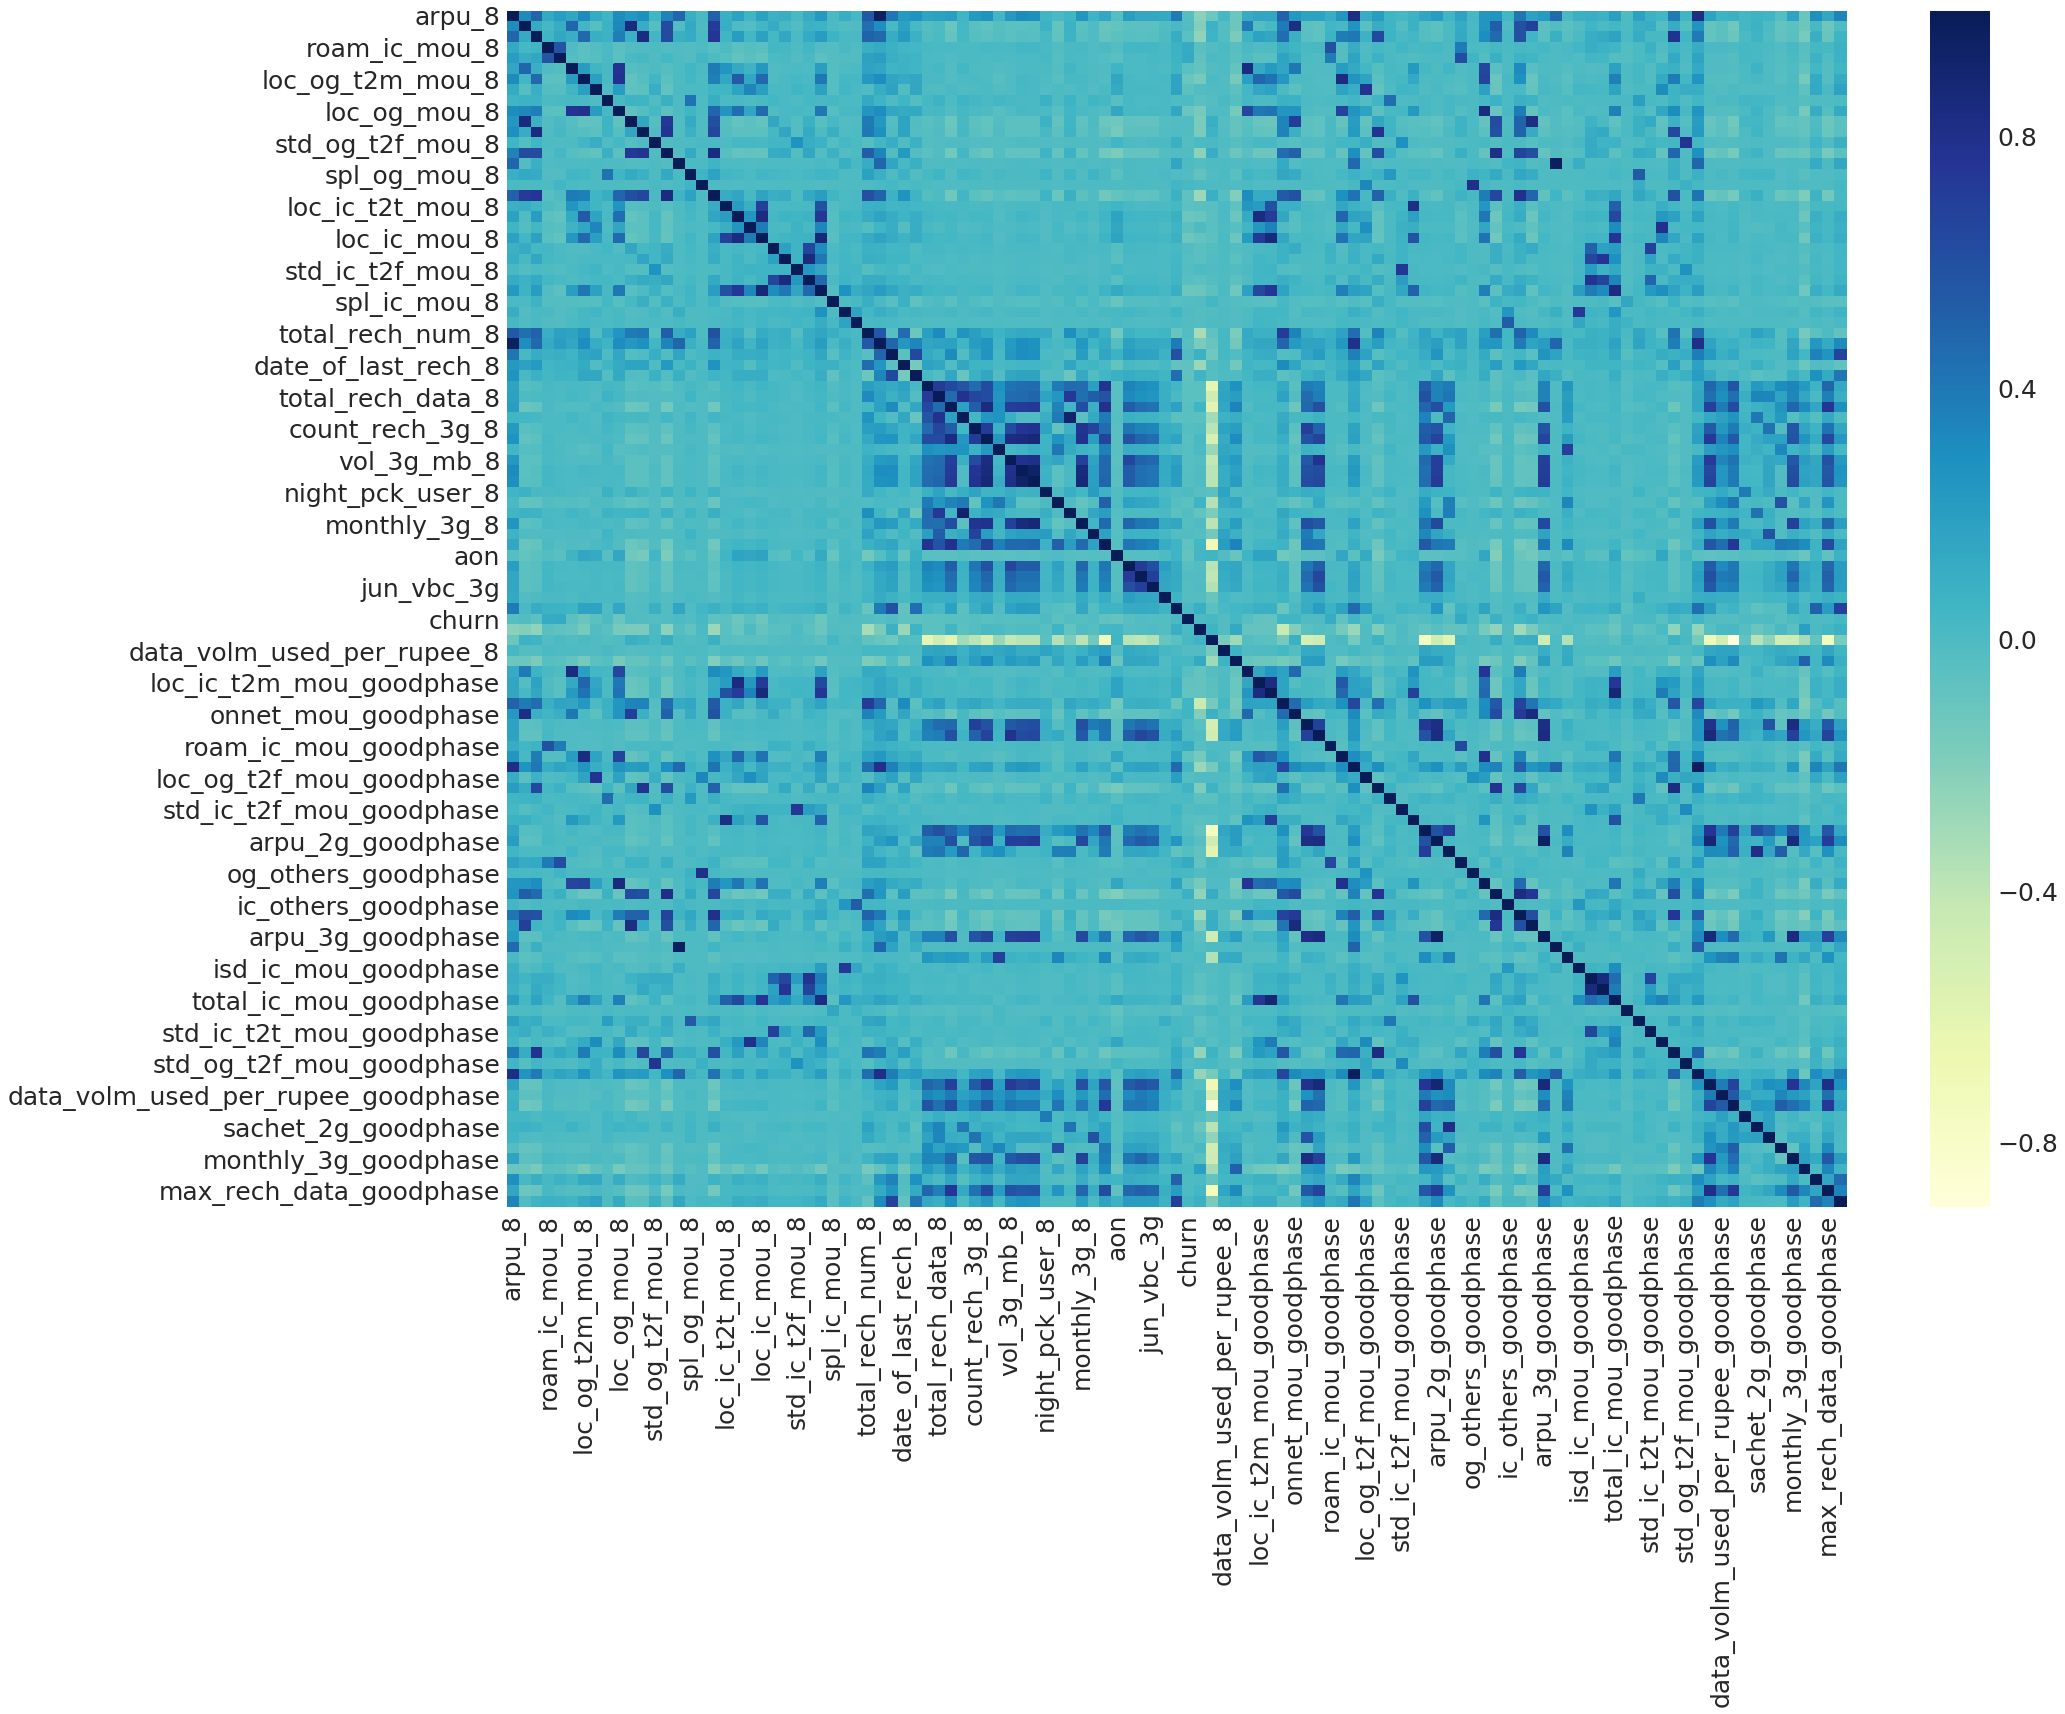

In [50]:
sns.set(rc={'figure.figsize':(30,22)})
sns.set(font_scale=2.5)
sns.heatmap(telecom_df.corr(), vmax=1., square=False , cmap="YlGnBu")
plt.show()

In [51]:
c = telecom_df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so[-133:-113]

loc_ic_mou_8                total_ic_mou_8                0.880955
total_ic_mou_8              loc_ic_mou_8                  0.880955
loc_ic_mou_goodphase        total_ic_mou_goodphase        0.885845
total_ic_mou_goodphase      loc_ic_mou_goodphase          0.885845
av_rech_amt_data_goodphase  arpu_2g_goodphase             0.889392
arpu_2g_goodphase           av_rech_amt_data_goodphase    0.889392
fb_user_goodphase           recency_data_goodphase        0.902116
recency_data_goodphase      fb_user_goodphase             0.902116
count_rech_2g_8             sachet_2g_8                   0.918357
sachet_2g_8                 count_rech_2g_8               0.918357
arpu_3g_8                   arpu_2g_8                     0.937300
arpu_2g_8                   arpu_3g_8                     0.937300
arpu_3g_goodphase           arpu_2g_goodphase             0.948517
arpu_2g_goodphase           arpu_3g_goodphase             0.948517
total_rech_amt_8            arpu_8                        0.95

In [52]:
#drop one of two columns with correlation above .88
column_drops = ['loc_ic_mou_8','loc_ic_mou_goodphase','arpu_2g_goodphase','fb_user_goodphase', \
               'sachet_2g_8','arpu_2g_8','arpu_8','isd_og_mou_8','total_rech_amt_goodphase']
telecom_df.drop(column_drops,axis=1,inplace=True)

In [53]:
#Test-Train
from sklearn.model_selection import train_test_split
X = telecom_df.drop('churn',axis=1)
y = telecom_df['churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state = 99)
X_train.head()

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,night_pck_user_8,monthly_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_67,recency_goodphase,recency_data_goodphase,data_volm_used_per_rupee_8,dataHeavy_8,loc_og_t2t_mou_goodphase,loc_ic_t2m_mou_goodphase,total_rech_num_goodphase,onnet_mou_goodphase,count_rech_3g_goodphase,vol_3g_mb_goodphase,roam_ic_mou_goodphase,loc_og_t2m_mou_goodphase,loc_og_t2f_mou_goodphase,std_og_t2m_mou_goodphase,loc_og_t2c_mou_goodphase,std_ic_t2f_mou_goodphase,loc_ic_t2t_mou_goodphase,total_rech_data_goodphase,count_rech_2g_goodphase,roam_og_mou_goodphase,og_others_goodphase,loc_og_mou_goodphase,std_og_mou_goodphase,ic_others_goodphase,total_og_mou_goodphase,std_og_t2t_mou_goodphase,arpu_3g_goodphase,isd_og_mou_goodphase,vol_2g_mb_goodphase,isd_ic_mou_goodphase,std_ic_mou_goodphase,std_ic_t2m_mou_goodphase,total_ic_mou_goodphase,spl_ic_mou_goodphase,spl_og_mou_goodphase,std_ic_t2t_mou_goodphase,loc_ic_t2f_mou_goodphase,offnet_mou_goodphase,std_og_t2f_mou_goodphase,arpu_goodphase,av_rech_amt_data_goodphase,data_volm_used_per_rupee_goodphase,night_pck_user_goodphase,sachet_2g_goodphase,sachet_3g_goodphase,monthly_2g_goodphase,monthly_3g_goodphase,dataHeavy_goodphase,last_day_rch_amt_goodphase,max_rech_data_goodphase,max_rech_amt_goodphase
4545,0.016611,0.110281,0.003398,0.010802,0.007557,0.068472,0.0,0.000000,0.038133,0.012102,0.082274,0.0,0.089036,0.000000,0.0,0.118614,0.002518,0.081079,0.00365,0.007364,0.003535,0.0,0.007584,0.039035,0.000000,0.016295,0.011182,0.117647,0.019837,0.034615,0.87500,0.034615,0.87500,0.047619,0.099035,0.105263,0.000000,0.043916,0.071131,0.000000,0.005363,0.0,0.25,0.0000,0.00000,1.0,0.201159,0.000000,0.000000,0.000000,0.0,0.027231,0.033333,0.016393,0.002485,0.0,0.008514,0.045678,0.252252,0.011086,0.000000,0.000000,0.009447,0.083385,0.000691,0.169732,0.0,0.0,0.003005,0.077982,0.163462,0.051215,0.000000,0.064323,0.150155,0.000000,0.184269,3.167723e-03,0.001210,0.000000,0.041635,0.002046,0.006225,0.008126,0.030143,0.000000,0.003080,0.000353,0.003449,0.216117,0.0,0.049197,0.060561,0.006305,0.0,0.000000,0.000000,0.4,0.0000,0.0,0.063871,0.127331,0.046938
24162,0.000000,0.000052,0.000000,0.000000,0.000000,0.000147,0.0,0.001022,0.000066,0.000000,0.000000,0.0,0.000000,0.002892,0.0,0.000249,0.000000,0.000613,0.00000,0.000000,0.000000,0.0,0.000000,0.000215,0.000000,0.000000,0.000180,0.088235,0.048610,0.145875,0.84375,0.145875,0.68750,0.047619,0.162058,0.000000,0.047619,0.123651,0.007802,0.035874,0.119437,0.0,0.00,0.1250,0.00000,1.0,0.227481,0.049490,0.033090,0.038289,0.0,0.081827,0.033333,0.393443,0.001716,0.0,0.000760,0.003641,0.124324,0.000609,0.082803,0.028963,0.000000,0.004693,0.000000,0.001467,0.0,0.0,0.000023,0.059633,0.000000,0.000000,0.002756,0.003882,0.001278,0.000000,0.004351,9.164350e-07,0.067995,0.000362,0.002078,0.000000,0.000000,0.000000,0.001813,0.000000,0.003463,0.000000,0.000000,0.003904,0.0,0.055736,0.067805,0.014455,0.0,0.000000,0.000000,0.0,0.0625,0.0,0.080645,0.162058,0.138809
23405,0.001450,0.004421,0.000000,0.000000,0.001450,0.011827,0.0,0.000000,0.006728,0.000000,0.000072,0.0,0.000072,0.002336,0.0,0.005521,0.009011,0.046673,0.00378,0.001031,0.001973,0.0,0.002464,0.026595,0.000000,0.000839,0.000000,0.044118,0.004501,0.034615,0.81250,0.011238,0.18750,0.023810,0.099035,0.052632,0.000000,0.037782,0.053335,0.000000,0.005363,0.0,0.25,0.0000,0.

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,Y_train)
rfe = RFE(lm,35)
rfe = rfe.fit(X_train,Y_train)

In [57]:
import statsmodels.api as sm
col = X_train.columns[rfe.support_]
x_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(Y_train,x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     35.79
Date:                Mon, 24 Jun 2019   Prob (F-statistic):          6.96e-232
Time:                        23:00:10   Log-Likelihood:                 4067.0
No. Observations:               17852   AIC:                            -8062.
Df Residuals:                   17816   BIC:                            -7782.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1130      0.004     28.363      0.000       0.105       0.121
loc_og_t2t_mou_8           2.05e+04   2640.907      7.763      0.000    1.53e+04    2.57e+04
loc_og_t2m_mou_8          9459.9118   1218.540      7.763      0.000    7071.454    1.18e+04
loc_og_t2f_mou_8          1770.3957    228.051      7.763      0.000    1323.394    2217.398
loc_og_mou_8             -2.105e+04   2711.480     -7.763      0.000   -2.64e+04   -1.57e+04
std_og_t2t_mou_8          5659.5829   2609.462      2.169      0.030     544.783    1.08e+04
std_og_t2m_mou_8          9851.2931   4542.072      2.169      0.030     948.391    1.88e+04
std_og_t2f_mou_8           364.9452    168.315      2.168      0.030      35.032     694.858
std_og_mou_8             -9873.4254   4551.840     -2.169      0.030   -1.88e+04    -951.376
loc_ic_t2t_mou_8          2.561e+04   1880.432     13.621      0.000    2.19e+04    2.93e+04
loc_ic_t2m_mou_8          8705.8399    639.175     13.620      0.000    7452.995    9958.685
loc_ic_t2f_mou_8          3135.7115    230.219     13.621      0.000    2684.460    3586.963
std_ic_t2t_mou_8          4543.4073   1048.492      4.333      0.000    2488.262    6598.553
std_ic_t2m_mou_8          7493.0523   1729.173      4.333      0.000    4103.706    1.09e+04
std_ic_t2f_mou_8          1851.3293    427.223      4.333      0.000    1013.931    2688.728
std_ic_mou_8              6358.0961   2096.465      3.033      0.002    2248.821    1.05e+04
total_ic_mou_8           -2.593e+04   1904.012    -13.621      0.000   -2.97e+04   -2.22e+04
spl_ic_mou_8                14.7892      1.106     13.368      0.000      12.621      16.958
isd_ic_mou_8              6592.2170    483.982     13.621      0.000    5643.566    7540.869
ic_others_8               1329.8969     97.636     13.621      0.000    1138.521    1521.273
loc_og_t2t_mou_goodphase  7190.0512   1829.044      3.931      0.000    3604.946    1.08e+04
loc_og_t2m_mou_goodphase  5060.5465   1287.341      3.931      0.000    2537.233    7583.860
loc_og_t2f_mou_goodphase  1498.8352    381.266      3.931      0.000     751.518    2246.153
std_og_t2m_mou_goodphase -7899.5368   3317.398     -2.381      0.017   -1.44e+04   -1397.113
std_ic_t2f_mou_goodphase -1810.8945    422.930     -4.282      0.000   -2639.878    -981.911
og_others_goodphase       -129.1225     74.474     -1.734      0.083    -275.099      16.854
loc_og_mou_goodphase     -1.073e+04   2594.522     -4.137      0.000   -1.58e+04   -5648.765
std_og_mou_goodphase      4239.6800   4758.901      0.891      0.373   -5088.228    1.36e+04
total_og_mou_goodphase    5074.4905   2918.643      1.739      0.082    -646.334    1.08e+04
std_og_t2t_mou_goodphase -7159.0122   3006.436     -2.381      0.017   -1.31e+04   -1266.105
isd_og_mou_goo

In [105]:
Y_train.shape

(17852,)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train[col], Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_default = dt_default.predict(X_test[col])
print(classification_report(Y_test, y_pred_default))
print(confusion_matrix(Y_test,y_pred_default))
print(accuracy_score(Y_test,y_pred_default))

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      7302
        1.0       0.43      0.06      0.10       349

avg / total       0.93      0.95      0.94      7651

[[7276   26]
 [ 329   20]]
0.9536008364919618


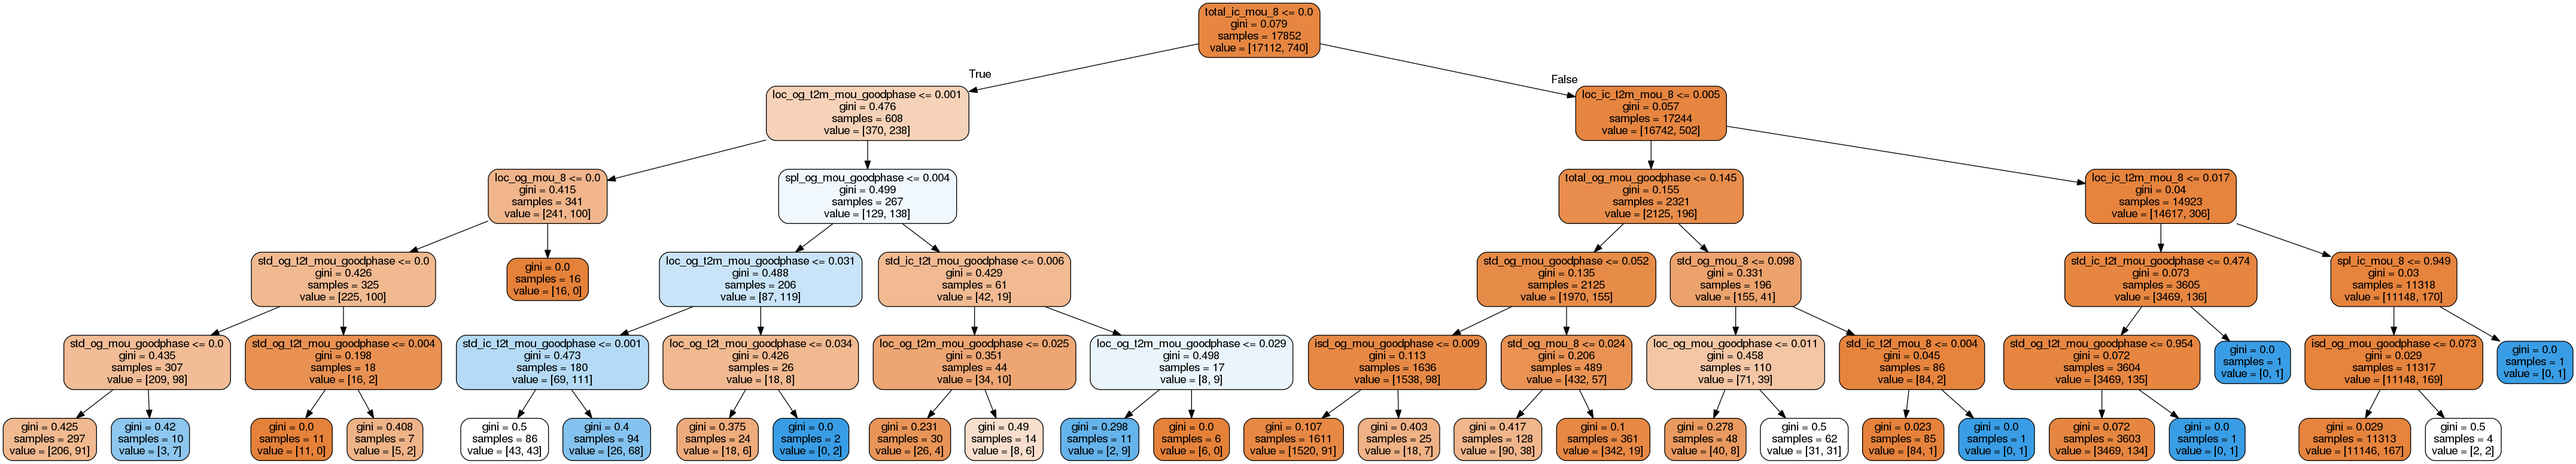

In [60]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

features = list(col)
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [61]:
#Hypter Param tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,  cv = n_folds, verbose = 1)
grid_search.fit(X_train[col],Y_train)
cv_results = pd.DataFrame(grid_search.cv_results_)
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=10, \
                                  min_samples_leaf=50,min_samples_split=50)
clf_gini.fit(X_train[col], Y_train)
clf_gini.score(X_test[col],Y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   26.3s finished
/home/nautiyogi/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nautiyogi/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nautiyogi/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=

best accuracy 0.9594443199641497
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


0.9537315383609986

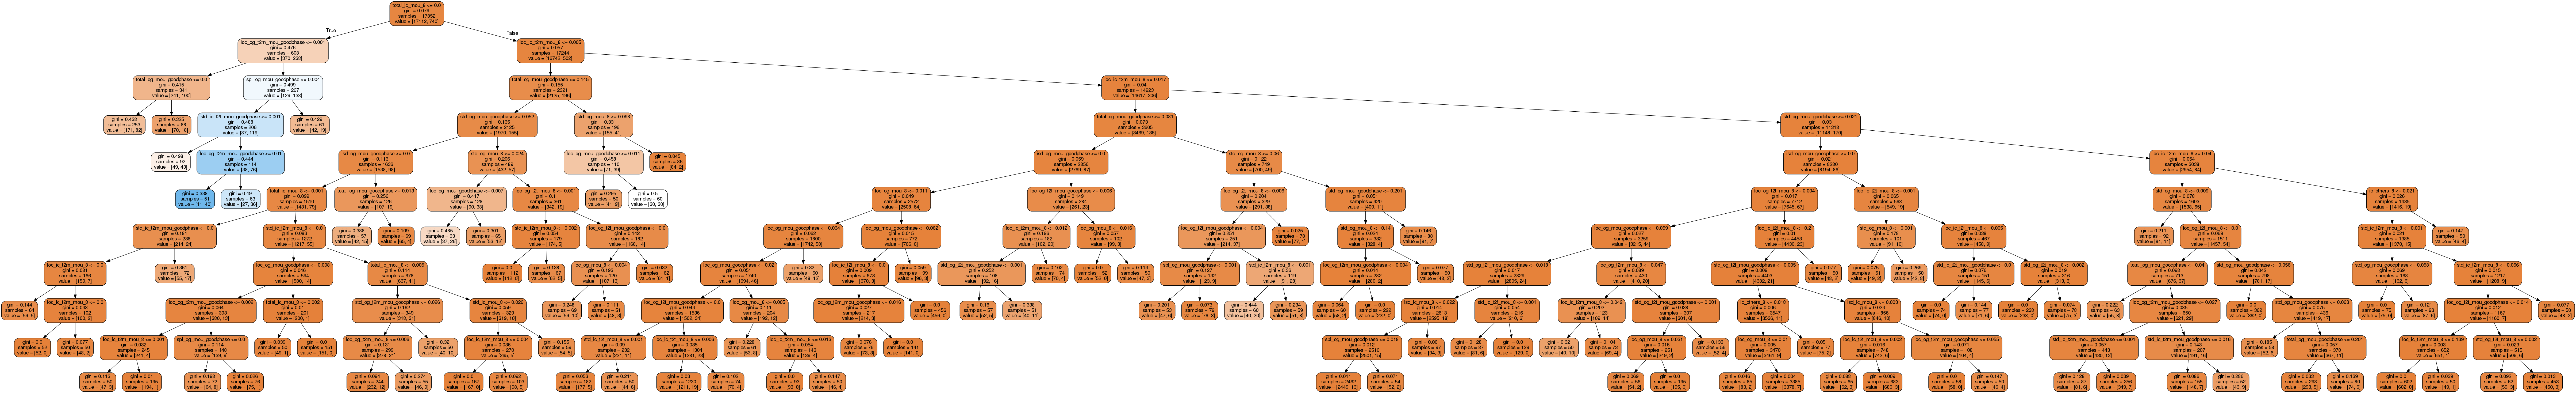

In [62]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [63]:
y_pred = clf_gini.predict(X_test[col])
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      7302
        1.0       0.45      0.06      0.11       349

avg / total       0.93      0.95      0.94      7651

[[7276   26]
 [ 328   21]]


### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
grid_search.fit(X_train[col], Y_train)
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


KeyboardInterrupt: 

In [1]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,max_depth=4,min_samples_leaf=100, 
            min_samples_split=200,max_features=5,n_estimators=100)

rfc.fit(X_train[col],Y_train)
predictions = rfc.predict(X_test[col])
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

NameError: name 'X_train' is not defined